In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
director_coremetrics = pd.read_excel('BS_AllCompanies_Overview_March2023update.xlsx', sheet_name='DIRECTOR_COREMETRICS')
company_coremetrics = pd.read_excel('BS_AllCompanies_Overview_March2023update.xlsx', sheet_name='COMPANY_COREMETRICS')
dir_comp_coremetrics = pd.read_excel('BS_AllCompanies_Overview_March2023update.xlsx', sheet_name='DIRECTOR_COMPANY_COREMETRICS')

In [6]:
filt = ((dir_comp_coremetrics['DIRECTOR: GENDER'] == 'Not Stated') | (dir_comp_coremetrics['DIRECTOR: GENDER'].isnull()))
# Cleaning Gender Variable
cleaned_dir_comp = dir_comp_coremetrics[~ filt].copy()

# Imputing Age
cleaned_dir_comp['DIRECTOR: AGE'] = cleaned_dir_comp['DIRECTOR: AGE'].fillna(cleaned_dir_comp['DIRECTOR: AGE'].mean())

In [7]:
cleaned_dir_comp

,DIRECTOR: ID,DIRECTOR: NAME,DIRECTOR: AGE,DIRECTOR: GENDER,DIRECTOR: DIVERSITY,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: CUSIP,COMPANY: DOMICILE,COMPANY: SECTOR,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,INFLUENCE: MRY,INFLUENCE:2023,INFLUENCE:2022,INFLUENCE:2021,INFLUENCE:2020,INFLUENCE:2019,INFLUENCE:2018,INFLUENCE DRIVER: ADVANCED DEGREE,INFLUENCE DRIVER: ELITE SCHOOL,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE
0,150319,Adam Hanft,73.0,Male,NaN,2,2,"1-800-FLOWERS.COM, INC.",FLWS,NaN,US,Consumer Discretionary,1,11,13,0.3,0.3,0.3,0.2,0.2,NaN,NaN,No,No,Yes,No,No,No,No,No,Unrated,Unrated,Unrated,Unrated,Unrated
1,554436,Celia Brown,68.0,Female,NaN,1,1,"1-800-FLOWERS.COM, INC.",FLWS,NaN,US,Consumer Discretionary,1,11,13,3.5,3.5,3.5,3.4,3.1,3.0,3.0,Yes,No,Yes,No,Yes,Yes,No,No,0.616,0.312,0.521,0.819,1
2,108789,Christopher McCann,61.0,Male,NaN,1,1,"1-800-FLOWERS.COM, INC.",FLWS,NaN,US,Consumer Discretionary,1,11,13,12.0,12.0,12.0,11.9,11.9,12.2,12.2,No,No,Yes,Yes,No,No,No,Yes,0.618,0.315,0.536,0.817,1
3,677135,Dina Colombo,53.0,Female,NaN,1,1,"1-800-FLOWERS.COM, INC.",FLWS,NaN,US,Consumer Discretionary,1,11,13,1.3,1.3,1.3,NaN,NaN,NaN,NaN,No,No,No,No,No,Yes,No,No,Unrated,Unrated,Unrated,Unrated,Unrated
4,175585,Eugene DeMark,75.0,Male,NaN,1,2,"1-800-FLOWERS.COM, INC.",FLWS,NaN,US,Consumer Discretionary,1,11,13,2.0,2.0,2.0,1.9,1.9,1.8,1.8,Yes,No,No,No,Yes,Yes,No,No,0.618,0.314,0.529,0.818,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,559363,Troy Cox,58.0,Male,NaN,2,2,Zymeworks Inc,ZYME,NaN,CA,NaN,1,8,9,5.6,5.6,6.0,6.0,6.7,NaN,NaN,Yes,No,Yes,No,No,Yes,No,No,Unrated,Unrated,Unrated,Unrated,Unrated
86768,232433,Barry Michaels,72.0,Male,NaN,1,1,Zynex Inc,ZYXI,NaN,US,Health Care,1,4,4,18.2,18.2,18.2,18.2,18.2,NaN,NaN,Yes,No,Yes,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1
86769,232874,Joshua Disbrow,47.0,Male,NaN,1,1,Zynex Inc,ZYXI,NaN,US,Health Care,1,4,4,16.8,16.8,16.8,16.8,16.8,NaN,NaN,No,No,Yes,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1
86770,638372,Michael Cress,64.0,Male,NaN,1,1,Zynex Inc,ZYXI,NaN,US,Health Care,1,4,4,18.2,18.2,18.2,18.2,18.2,NaN,NaN,Yes,No,Yes,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1


In [8]:
cleaned_dir_comp['AVG_INFLUENCE'] = cleaned_dir_comp[['INFLUENCE:2023','INFLUENCE:2022','INFLUENCE:2021','INFLUENCE:2020','INFLUENCE:2019','INFLUENCE:2018']].mean(axis=1,skipna=True).round(2)

In [9]:
cleaned_dir_comp

,DIRECTOR: ID,DIRECTOR: NAME,DIRECTOR: AGE,DIRECTOR: GENDER,DIRECTOR: DIVERSITY,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: CUSIP,COMPANY: DOMICILE,COMPANY: SECTOR,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,INFLUENCE: MRY,INFLUENCE:2023,INFLUENCE:2022,INFLUENCE:2021,INFLUENCE:2020,INFLUENCE:2019,INFLUENCE:2018,INFLUENCE DRIVER: ADVANCED DEGREE,INFLUENCE DRIVER: ELITE SCHOOL,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE,AVG_INFLUENCE
0,150319,Adam Hanft,73.0,Male,NaN,2,2,"1-800-FLOWERS.COM, INC.",FLWS,NaN,US,Consumer Discretionary,1,11,13,0.3,0.3,0.3,0.2,0.2,NaN,NaN,No,No,Yes,No,No,No,No,No,Unrated,Unrated,Unrated,Unrated,Unrated,0.25
1,554436,Celia Brown,68.0,Female,NaN,1,1,"1-800-FLOWERS.COM, INC.",FLWS,NaN,US,Consumer Discretionary,1,11,13,3.5,3.5,3.5,3.4,3.1,3.0,3.0,Yes,No,Yes,No,Yes,Yes,No,No,0.616,0.312,0.521,0.819,1,3.25
2,108789,Christopher McCann,61.0,Male,NaN,1,1,"1-800-FLOWERS.COM, INC.",FLWS,NaN,US,Consumer Discretionary,1,11,13,12.0,12.0,12.0,11.9,11.9,12.2,12.2,No,No,Yes,Yes,No,No,No,Yes,0.618,0.315,0.536,0.817,1,12.03
3,677135,Dina Colombo,53.0,Female,NaN,1,1,"1-800-FLOWERS.COM, INC.",FLWS,NaN,US,Consumer Discretionary,1,11,13,1.3,1.3,1.3,NaN,NaN,NaN,NaN,No,No,No,No,No,Yes,No,No,Unrated,Unrated,Unrated,Unrated,Unrated,1.30
4,175585,Eugene DeMark,75.0,Male,NaN,1,2,"1-800-FLOWERS.COM, INC.",FLWS,NaN,US,Consumer Discretionary,1,11,13,2.0,2.0,2.0,1.9,1.9,1.8,1.8,Yes,No,No,No,Yes,Yes,No,No,0.618,0.314,0.529,0.818,1,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,559363,Troy Cox,58.0,Male,NaN,2,2,Zymeworks Inc,ZYME,NaN,CA,NaN,1,8,9,5.6,5.6,6.0,6.0,6.7,NaN,NaN,Yes,No,Yes,No,No,Yes,No,No,Unrated,Unrated,Unrated,Unrated,Unrated,6.08
86768,232433,Barry Michaels,72.0,Male,NaN,1,1,Zynex Inc,ZYXI,NaN,US,Health Care,1,4,4,18.2,18.2,18.2,18.2,18.2,NaN,NaN,Yes,No,Yes,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1,18.20
86769,232874,Joshua Disbrow,47.0,Male,NaN,1,1,Zynex Inc,ZYXI,NaN,US,Health Care,1,4,4,16.8,16.8,16.8,16.8,16.8,NaN,NaN,No,No,Yes,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1,16.80
86770,638372,Michael Cress,64.0,Male,NaN,1,1,Zynex Inc,ZYXI,NaN,US,Health Care,1,4,4,18.2,18.2,18.2,18.2,18.2,NaN,NaN,Yes,No,Yes,No,Yes,Yes,No,No,0.807,0.692,0.69,0.806,1,18.20


In [10]:
cleaned_dir_comp.columns

Index(['DIRECTOR: ID', 'DIRECTOR: NAME', 'DIRECTOR: AGE', 'DIRECTOR: GENDER',
       'DIRECTOR: DIVERSITY', 'DIRECTOR: ACTIVE BOARDS',
       'DIRECTOR: BOARD HISTORY', 'COMPANY: NAME', 'COMPANY: TICKER',
       'COMPANY: CUSIP', 'COMPANY: DOMICILE', 'COMPANY: SECTOR',
       'COMPANY: LEAGUE', 'COMPANY: ACTIVE DIRECTORS',
       'COMPANY: ALL DIRECTORS', 'INFLUENCE: MRY', 'INFLUENCE:2023',
       'INFLUENCE:2022', 'INFLUENCE:2021', 'INFLUENCE:2020', 'INFLUENCE:2019',
       'INFLUENCE:2018', 'INFLUENCE DRIVER: ADVANCED DEGREE',
       'INFLUENCE DRIVER: ELITE SCHOOL', 'INFLUENCE DRIVER: HAS BEEN CEO',
       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 'INFLUENCE DRIVER: CHAIR ROLE',
       'INFLUENCE DRIVER: COMMITTEE ROLE',
       'INFLUENCE DRIVER: BOARD CONNECTIONS',
       'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE', 'PERFORMANCE: WIN RATE',
       'PERFORMANCE: EBITDA WIN RATE', 'PERFORMANCE: TSR WIN RATE',
       'PERFORMANCE: CARBON INTENSITY WIN RATE',
       'PERFORMANCE: CONTROVERS

In [11]:
conv_cols = ['INFLUENCE DRIVER: ADVANCED DEGREE', 'INFLUENCE DRIVER: ELITE SCHOOL', 'INFLUENCE DRIVER: HAS BEEN CEO',
       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 'INFLUENCE DRIVER: CHAIR ROLE', 'INFLUENCE DRIVER: COMMITTEE ROLE',
       'INFLUENCE DRIVER: BOARD CONNECTIONS', 'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE']
for col in conv_cols:
    cleaned_dir_comp[col] = cleaned_dir_comp[col].map({'Yes':1, 'No':0})

In [12]:
cleaned_dir_comp = cleaned_dir_comp.drop(['DIRECTOR: DIVERSITY','COMPANY: CUSIP'], axis=1)

In [13]:
cleaned_dir_comp

,DIRECTOR: ID,DIRECTOR: NAME,DIRECTOR: AGE,DIRECTOR: GENDER,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: DOMICILE,COMPANY: SECTOR,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,INFLUENCE: MRY,INFLUENCE:2023,INFLUENCE:2022,INFLUENCE:2021,INFLUENCE:2020,INFLUENCE:2019,INFLUENCE:2018,INFLUENCE DRIVER: ADVANCED DEGREE,INFLUENCE DRIVER: ELITE SCHOOL,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE,AVG_INFLUENCE
0,150319,Adam Hanft,73.0,Male,2,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,0.3,0.3,0.3,0.2,0.2,NaN,NaN,0,0,1,0,0,0,0,0,Unrated,Unrated,Unrated,Unrated,Unrated,0.25
1,554436,Celia Brown,68.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,3.5,3.5,3.5,3.4,3.1,3.0,3.0,1,0,1,0,1,1,0,0,0.616,0.312,0.521,0.819,1,3.25
2,108789,Christopher McCann,61.0,Male,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,12.0,12.0,12.0,11.9,11.9,12.2,12.2,0,0,1,1,0,0,0,1,0.618,0.315,0.536,0.817,1,12.03
3,677135,Dina Colombo,53.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,1.3,1.3,1.3,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,Unrated,Unrated,Unrated,Unrated,Unrated,1.30
4,175585,Eugene DeMark,75.0,Male,1,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,2.0,2.0,2.0,1.9,1.9,1.8,1.8,1,0,0,0,1,1,0,0,0.618,0.314,0.529,0.818,1,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,559363,Troy Cox,58.0,Male,2,2,Zymeworks Inc,ZYME,CA,NaN,1,8,9,5.6,5.6,6.0,6.0,6.7,NaN,NaN,1,0,1,0,0,1,0,0,Unrated,Unrated,Unrated,Unrated,Unrated,6.08
86768,232433,Barry Michaels,72.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,18.2,18.2,18.2,18.2,18.2,NaN,NaN,1,0,1,0,1,1,0,0,0.807,0.692,0.69,0.806,1,18.20
86769,232874,Joshua Disbrow,47.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,16.8,16.8,16.8,16.8,16.8,NaN,NaN,0,0,1,0,1,1,0,0,0.807,0.692,0.69,0.806,1,16.80
86770,638372,Michael Cress,64.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,18.2,18.2,18.2,18.2,18.2,NaN,NaN,1,0,1,0,1,1,0,0,0.807,0.692,0.69,0.806,1,18.20


## Overall Win Rate Analysis

In [25]:
win_rate_removed = cleaned_dir_comp[~ (cleaned_dir_comp['PERFORMANCE: WIN RATE'] == 'Unrated')]

In [26]:
win_rate_removed

,DIRECTOR: ID,DIRECTOR: NAME,DIRECTOR: AGE,DIRECTOR: GENDER,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: DOMICILE,COMPANY: SECTOR,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,INFLUENCE: MRY,INFLUENCE:2023,INFLUENCE:2022,INFLUENCE:2021,INFLUENCE:2020,INFLUENCE:2019,INFLUENCE:2018,INFLUENCE DRIVER: ADVANCED DEGREE,INFLUENCE DRIVER: ELITE SCHOOL,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE,AVG_INFLUENCE
1,554436,Celia Brown,68.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,3.5,3.5,3.5,3.4,3.1,3.0,3.0,1,0,1,0,1,1,0,0,0.616,0.312,0.521,0.819,1,3.25
2,108789,Christopher McCann,61.0,Male,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,12.0,12.0,12.0,11.9,11.9,12.2,12.2,0,0,1,1,0,0,0,1,0.618,0.315,0.536,0.817,1,12.03
4,175585,Eugene DeMark,75.0,Male,1,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,2.0,2.0,2.0,1.9,1.9,1.8,1.8,1,0,0,0,1,1,0,0,0.618,0.314,0.529,0.818,1,1.90
5,130106,James Cannavino,78.0,Male,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,1.6,1.6,1.6,1.5,2.0,2.0,2.0,0,0,1,0,1,1,0,0,0.625,0.321,0.563,0.815,1,1.78
6,22002,James McCann,71.0,Male,2,4,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,71.1,71.1,71.1,71.0,71.0,71.6,71.6,0,0,1,1,0,0,0,1,0.619,0.315,0.536,0.817,1,71.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86759,596241,Tarun Arora,50.0,Male,1,1,ZYDUS WELLNESS LIMITED,ZYDUSWELL,IN,Consumer Staples,1,8,8,11.1,11.1,11.1,10.6,10.6,NaN,NaN,1,0,1,1,0,0,0,0,0.539,0.8,0.456,0.274,0.532,10.85
86768,232433,Barry Michaels,72.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,18.2,18.2,18.2,18.2,18.2,NaN,NaN,1,0,1,0,1,1,0,0,0.807,0.692,0.69,0.806,1,18.20
86769,232874,Joshua Disbrow,47.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,16.8,16.8,16.8,16.8,16.8,NaN,NaN,0,0,1,0,1,1,0,0,0.807,0.692,0.69,0.806,1,16.80
86770,638372,Michael Cress,64.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,18.2,18.2,18.2,18.2,18.2,NaN,NaN,1,0,1,0,1,1,0,0,0.807,0.692,0.69,0.806,1,18.20


In [30]:
win_rate_enc = pd.get_dummies(win_rate_removed, columns=['DIRECTOR: GENDER', 'COMPANY: SECTOR'])

In [31]:
win_rate_enc.columns

Index(['DIRECTOR: ID', 'DIRECTOR: NAME', 'DIRECTOR: AGE',
       'DIRECTOR: ACTIVE BOARDS', 'DIRECTOR: BOARD HISTORY', 'COMPANY: NAME',
       'COMPANY: TICKER', 'COMPANY: DOMICILE', 'COMPANY: LEAGUE',
       'COMPANY: ACTIVE DIRECTORS', 'COMPANY: ALL DIRECTORS', 'INFLUENCE: MRY',
       'INFLUENCE:2023', 'INFLUENCE:2022', 'INFLUENCE:2021', 'INFLUENCE:2020',
       'INFLUENCE:2019', 'INFLUENCE:2018', 'INFLUENCE DRIVER: ADVANCED DEGREE',
       'INFLUENCE DRIVER: ELITE SCHOOL', 'INFLUENCE DRIVER: HAS BEEN CEO',
       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 'INFLUENCE DRIVER: CHAIR ROLE',
       'INFLUENCE DRIVER: COMMITTEE ROLE',
       'INFLUENCE DRIVER: BOARD CONNECTIONS',
       'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE', 'PERFORMANCE: WIN RATE',
       'PERFORMANCE: EBITDA WIN RATE', 'PERFORMANCE: TSR WIN RATE',
       'PERFORMANCE: CARBON INTENSITY WIN RATE',
       'PERFORMANCE: CONTROVERSY WIN RATE', 'AVG_INFLUENCE',
       'DIRECTOR: GENDER_Female', 'DIRECTOR: GENDER_Male',
     

In [44]:
cols_kept = ['DIRECTOR: AGE','DIRECTOR: ACTIVE BOARDS', 'DIRECTOR: BOARD HISTORY', 'INFLUENCE DRIVER: ADVANCED DEGREE',
       'INFLUENCE DRIVER: ELITE SCHOOL', 'INFLUENCE DRIVER: HAS BEEN CEO', 'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 'INFLUENCE DRIVER: CHAIR ROLE',
       'INFLUENCE DRIVER: COMMITTEE ROLE', 'INFLUENCE DRIVER: BOARD CONNECTIONS', 'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE', 'PERFORMANCE: WIN RATE',
       'AVG_INFLUENCE', 'DIRECTOR: GENDER_Female', 'DIRECTOR: GENDER_Male']
win_rate_df = win_rate_enc[cols_kept].copy()
win_rate_df['PERFORMANCE: WIN RATE'] = win_rate_df['PERFORMANCE: WIN RATE'].astype('float64')

In [38]:
win_rate_df

,DIRECTOR: AGE,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,INFLUENCE DRIVER: ADVANCED DEGREE,INFLUENCE DRIVER: ELITE SCHOOL,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,AVG_INFLUENCE,DIRECTOR: GENDER_Female,DIRECTOR: GENDER_Male
1,68.0,1,1,1,0,1,0,1,1,0,0,0.616,3.25,1,0
2,61.0,1,1,0,0,1,1,0,0,0,1,0.618,12.03,0,1
4,75.0,1,2,1,0,0,0,1,1,0,0,0.618,1.90,0,1
5,78.0,1,1,0,0,1,0,1,1,0,0,0.625,1.78,0,1
6,71.0,2,4,0,0,1,1,0,0,0,1,0.619,71.23,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86759,50.0,1,1,1,0,1,1,0,0,0,0,0.539,10.85,0,1
86768,72.0,1,1,1,0,1,0,1,1,0,0,0.807,18.20,0,1
86769,47.0,1,1,0,0,1,0,1,1,0,0,0.807,16.80,0,1
86770,64.0,1,1,1,0,1,0,1,1,0,0,0.807,18.20,0,1


In [40]:
win_rate_df.columns

Index(['DIRECTOR: AGE', 'DIRECTOR: ACTIVE BOARDS', 'DIRECTOR: BOARD HISTORY',
       'INFLUENCE DRIVER: ADVANCED DEGREE', 'INFLUENCE DRIVER: ELITE SCHOOL',
       'INFLUENCE DRIVER: HAS BEEN CEO',
       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 'INFLUENCE DRIVER: CHAIR ROLE',
       'INFLUENCE DRIVER: COMMITTEE ROLE',
       'INFLUENCE DRIVER: BOARD CONNECTIONS',
       'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE', 'PERFORMANCE: WIN RATE',
       'AVG_INFLUENCE', 'DIRECTOR: GENDER_Female', 'DIRECTOR: GENDER_Male'],
      dtype='object')

Text(0.5, 1.0, 'Fig 1: Correlation Matrix')

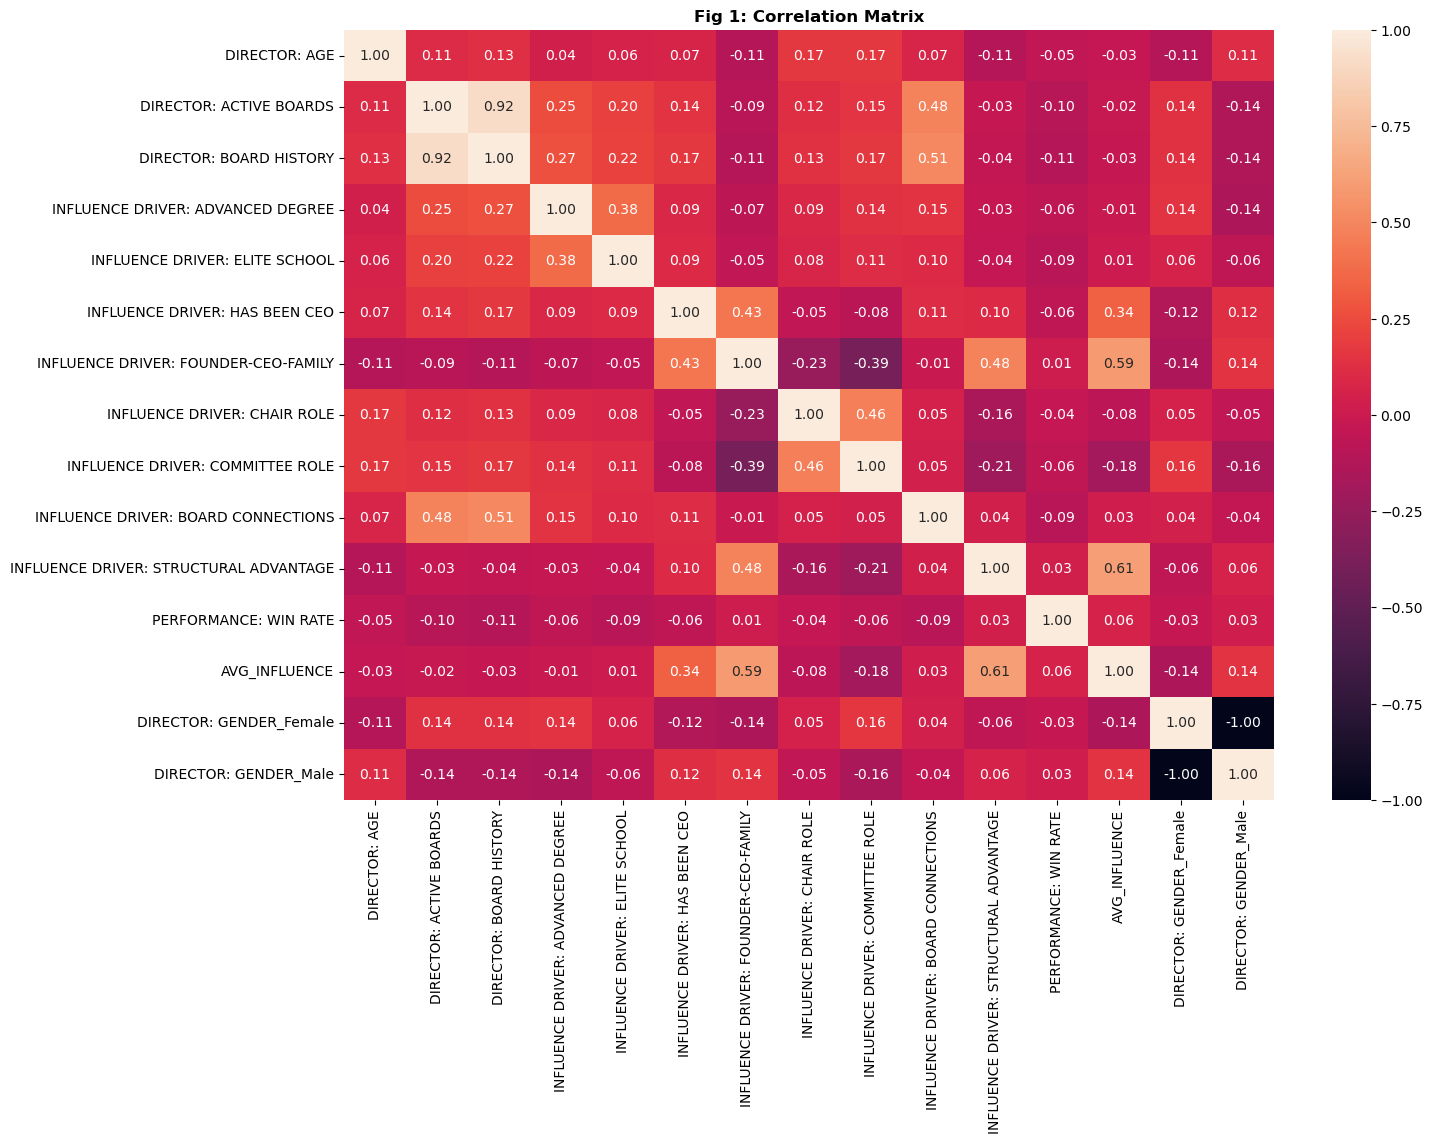

In [46]:
plt.figure(figsize=(15,10))
influence_corr = win_rate_df.corr()
sns.heatmap(influence_corr, annot=True, fmt='.2f')
plt.title('Fig 1: Correlation Matrix', fontweight='bold')

In [47]:
cols = ['DIRECTOR: AGE', 'DIRECTOR: ACTIVE BOARDS', 'DIRECTOR: BOARD HISTORY',
       'INFLUENCE DRIVER: ADVANCED DEGREE', 'INFLUENCE DRIVER: ELITE SCHOOL',
       'INFLUENCE DRIVER: HAS BEEN CEO', 'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 'INFLUENCE DRIVER: CHAIR ROLE',
       'INFLUENCE DRIVER: COMMITTEE ROLE', 'INFLUENCE DRIVER: BOARD CONNECTIONS',
       'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE','AVG_INFLUENCE', 'DIRECTOR: GENDER_Female', 'DIRECTOR: GENDER_Male']
x=win_rate_df[cols]
y=win_rate_df['PERFORMANCE: WIN RATE']

In [48]:
x= sm.add_constant(x)

model= sm.OLS(y, x).fit()
pred = model.predict(x)

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     PERFORMANCE: WIN RATE   R-squared:                       0.028
Model:                               OLS   Adj. R-squared:                  0.028
Method:                    Least Squares   F-statistic:                     136.3
Date:                   Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                           17:14:37   Log-Likelihood:                 14852.
No. Observations:                  60976   AIC:                        -2.968e+04
Df Residuals:                      60962   BIC:                        -2.955e+04
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

<AxesSubplot:xlabel='AVG_INFLUENCE', ylabel='PERFORMANCE: WIN RATE'>

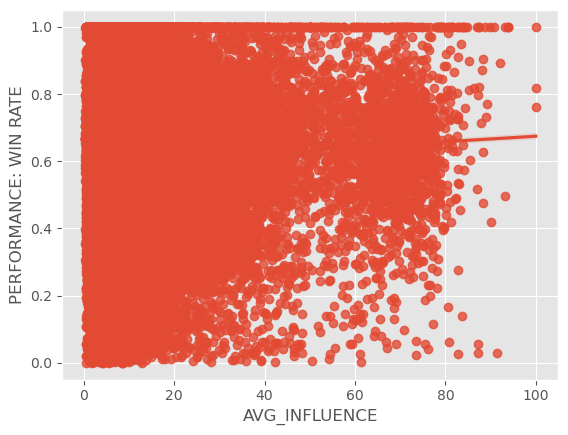

In [110]:
sns.regplot(data= win_rate_df, y= 'PERFORMANCE: WIN RATE', x= 'AVG_INFLUENCE')

## Done

In [12]:
cleaned_dir_comp.select_dtypes(include= object).describe()

,DIRECTOR: NAME,DIRECTOR: GENDER,COMPANY: NAME,COMPANY: TICKER,COMPANY: DOMICILE,COMPANY: SECTOR,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE
count,86531,86531,86531,86468,86531,86025,86531,86531,86531,86531,86531
unique,70156,2,9529,8956,67,11,996,1002,989,1002,932
top,Wei Zhang,Male,"Banco Comercial Portugues, S.A.",SOL,US,Industrials,Unrated,Unrated,Unrated,Unrated,1
freq,13,66006,29,44,25040,13350,25555,38026,43446,46093,41097


In [16]:
graph_cols = ['COMPANY: SECTOR', 'INFLUENCE DRIVER: ADVANCED DEGREE', 'INFLUENCE DRIVER: ELITE SCHOOL', 'INFLUENCE DRIVER: HAS BEEN CEO',
       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 'INFLUENCE DRIVER: CHAIR ROLE',
       'INFLUENCE DRIVER: COMMITTEE ROLE', 'INFLUENCE DRIVER: BOARD CONNECTIONS', 'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE']
df = cleaned_dir_comp[graph_cols]

In [17]:
df['COMPANY: SECTOR'].unique()

array(['Consumer Discretionary', 'Communication Services', 'Health Care',
       'Consumer Staples', 'Financials', 'Materials',
       'Information Technology', 'Industrials', 'Energy', 'Real Estate',
       'Utilities', nan], dtype=object)

In [73]:
cleaned_df['COMPANY: SECTOR'].value_counts()

Industrials               13350
Financials                12976
Consumer Discretionary    10335
Information Technology    10254
Health Care                9170
Materials                  7979
Consumer Staples           5787
Real Estate                5674
Communication Services     4138
Utilities                  3197
Energy                     3165
Name: COMPANY: SECTOR, dtype: int64

In [27]:
cleaned_df = df[~df['COMPANY: SECTOR'].isnull()].copy()

In [19]:
cleaned_df = cleaned_df[cleaned_df['COMPANY: SECTOR'].isin(['Industrials', 'Financials','Consumer Discretionary', 'Information Technology', 'Health Care'])]
#, 'Consumer Discretionary', 'Information Technology', 'Health Care'

In [82]:
cleaned_df = cleaned_df.set_index('COMPANY: SECTOR')

In [28]:
x_df = cleaned_df.copy()

In [29]:
x_df

,COMPANY: SECTOR,INFLUENCE DRIVER: ADVANCED DEGREE,INFLUENCE DRIVER: ELITE SCHOOL,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE
0,Consumer Discretionary,0,0,1,0,0,0,0,0
1,Consumer Discretionary,1,0,1,0,1,1,0,0
2,Consumer Discretionary,0,0,1,1,0,0,0,1
3,Consumer Discretionary,0,0,0,0,0,1,0,0
4,Consumer Discretionary,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
86759,Consumer Staples,1,0,1,1,0,0,0,0
86768,Health Care,1,0,1,0,1,1,0,0
86769,Health Care,0,0,1,0,1,1,0,0
86770,Health Care,1,0,1,0,1,1,0,0


In [30]:
x_df = x_df.groupby('COMPANY: SECTOR').agg(
    Advanced_Degree = ('INFLUENCE DRIVER: ELITE SCHOOL','sum'),
    Elite_School = ('INFLUENCE DRIVER: HAS BEEN CEO','sum'),
    Been_CEO = ('INFLUENCE DRIVER: FOUNDER-CEO-FAMILY','sum'),
    Founder_CEO_Family = ('INFLUENCE DRIVER: CHAIR ROLE','sum'),
    Chair_Role = ('INFLUENCE DRIVER: COMMITTEE ROLE','sum'),
    Committee_Role = ('INFLUENCE DRIVER: BOARD CONNECTIONS','sum'),
    Board_Connection = ('INFLUENCE DRIVER: BOARD CONNECTIONS','sum'),
    Structural_Advantage = ('INFLUENCE DRIVER: STRUCTURAL ADVANTAGE','sum')
)

In [31]:
x_df

,Advanced_Degree,Elite_School,Been_CEO,Founder_CEO_Family,Chair_Role,Committee_Role,Board_Connection,Structural_Advantage
COMPANY: SECTOR,,,,,,,,
Communication Services,792,1597,682,991,2480,575,575,461
Consumer Discretionary,1719,3773,1927,2630,6319,1034,1034,1200
Consumer Staples,760,1899,1110,1280,3337,627,627,771
Energy,556,1166,479,892,2075,421,421,222
Financials,2224,4366,1640,3135,8407,1253,1253,717
Health Care,2344,3532,1597,2642,5970,929,929,787
Industrials,1756,4502,2055,3223,8237,1249,1249,1000
Information Technology,1704,3556,1799,2714,6279,772,772,854
Materials,923,2567,1332,1937,4801,833,833,696


In [1]:
x_df

NameError: name 'x_df' is not defined

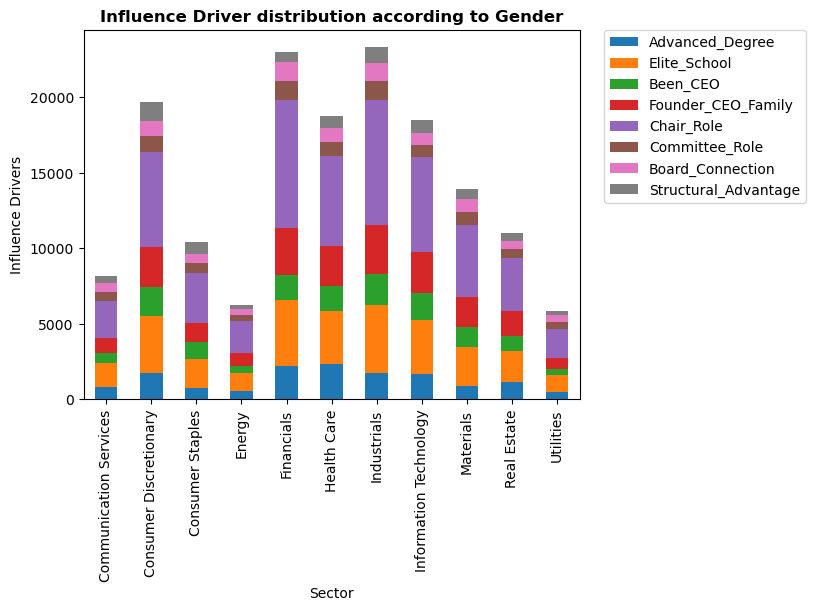

: 

In [32]:
x_df.plot(kind='bar', stacked=True)
plt.title('Influence Driver distribution according to Gender', fontweight= 'bold')
plt.xlabel('Sector')
plt.ylabel('Influence Drivers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Text(0.5, 1.0, 'Fig 1: Correlation Matrix')

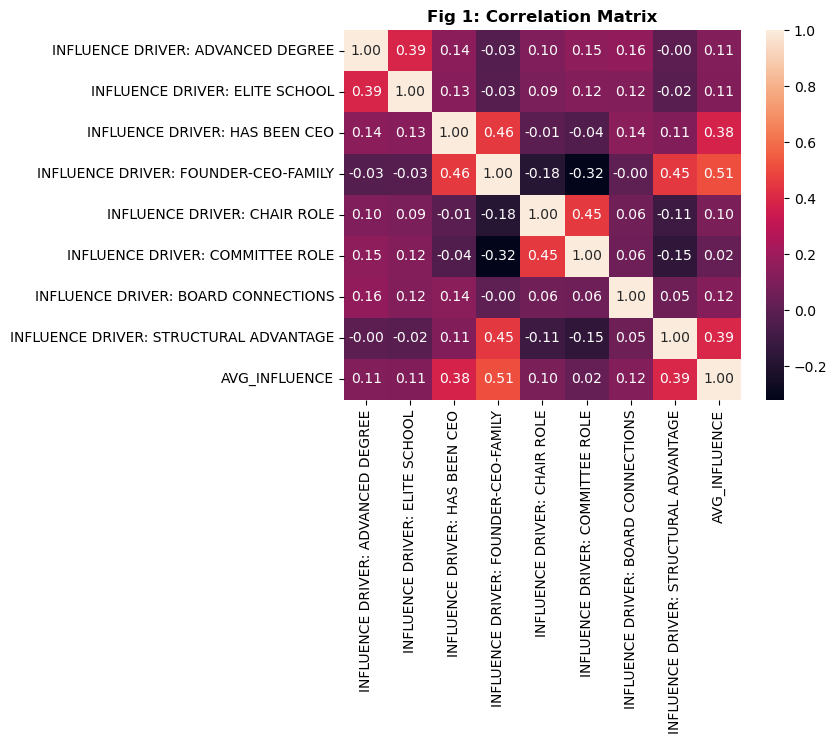

In [32]:
influence_corr = cleaned_dir_comp[cols+['AVG_INFLUENCE']].corr(method='spearman')
sns.heatmap(influence_corr, annot=True, fmt='.2f')
plt.title('Fig 1: Correlation Matrix', fontweight='bold')

In [62]:
new_df.columns

Index(['DIRECTOR: AGE', 'DIRECTOR: ACTIVE BOARDS', 'DIRECTOR: BOARD HISTORY',
       'INFLUENCE DRIVER: ADVANCED DEGREE', 'INFLUENCE DRIVER: ELITE SCHOOL',
       'INFLUENCE DRIVER: HAS BEEN CEO',
       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 'INFLUENCE DRIVER: CHAIR ROLE',
       'INFLUENCE DRIVER: COMMITTEE ROLE',
       'INFLUENCE DRIVER: BOARD CONNECTIONS',
       'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE', 'AVG_INFLUENCE',
       'DIRECTOR: GENDER_Female', 'DIRECTOR: GENDER_Male'],
      dtype='object')

In [125]:
cleaned_dir_comp['INFLUENCE DRIVER: ADVANCED DEGREE']

0        0
1        1
2        0
3        0
4        1
        ..
86767    1
86768    1
86769    0
86770    1
86771    1
Name: INFLUENCE DRIVER: ADVANCED DEGREE, Length: 86531, dtype: int64

<AxesSubplot:xlabel='INFLUENCE DRIVER: ADVANCED DEGREE', ylabel='AVG_INFLUENCE'>

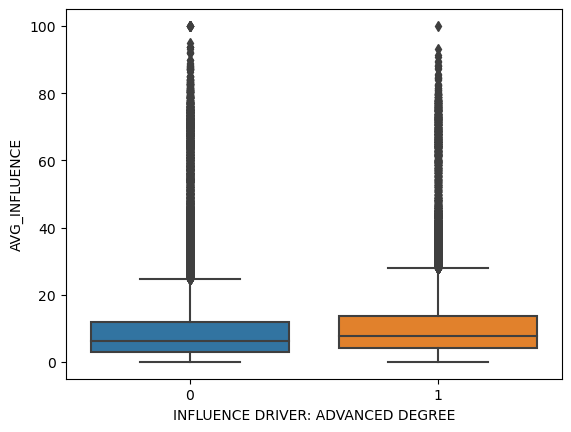

In [16]:
sns.boxplot( data=cleaned_dir_comp, x='INFLUENCE DRIVER: ADVANCED DEGREE', y='AVG_INFLUENCE')

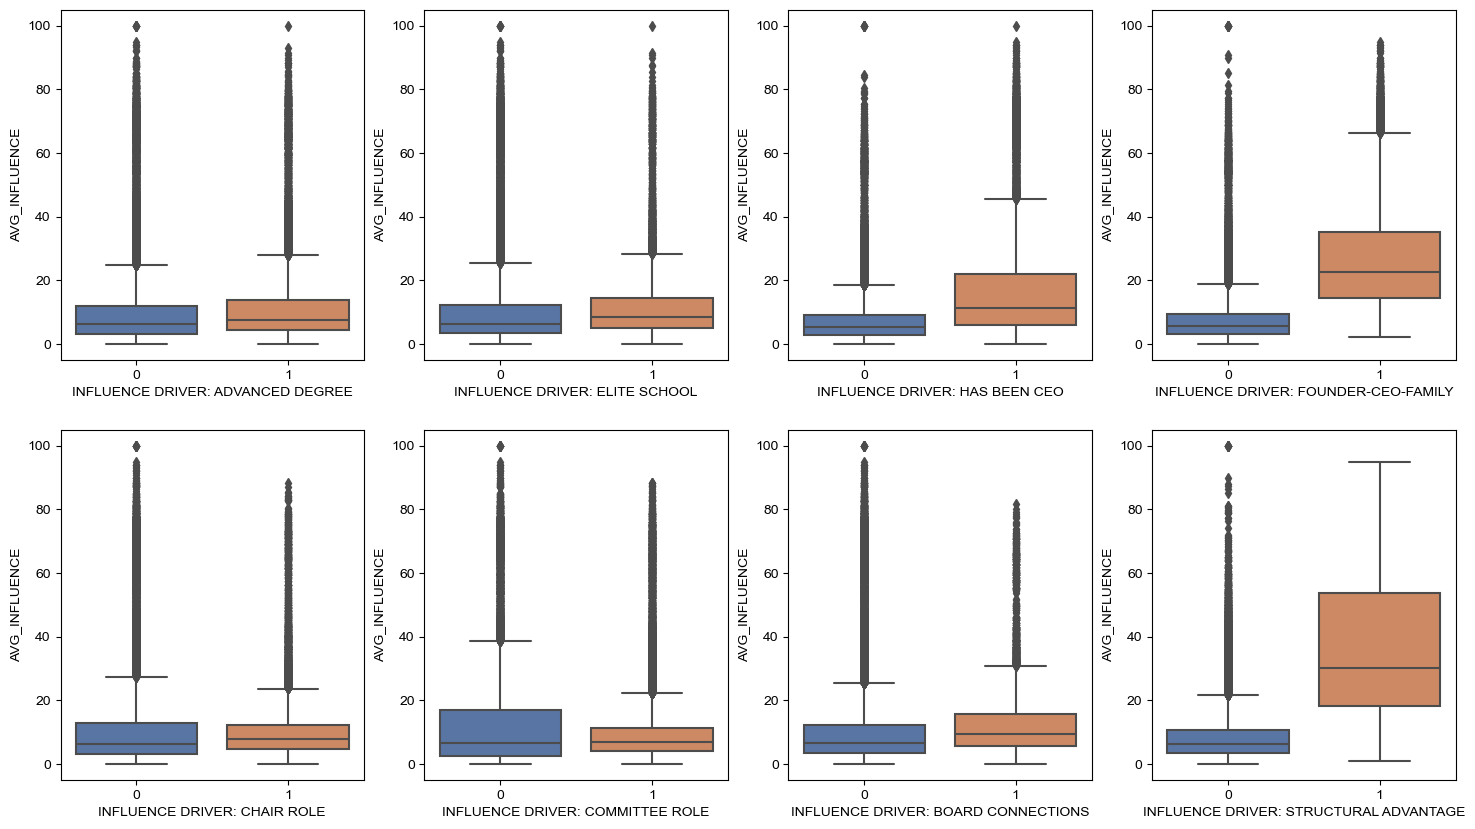

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
sns.set(font_scale = 1)
plt.rcParams['axes.labelsize'] = 1
# fig.suptitle('Influence Driver comparison over the Average Influence of the Directors', fontweight = 'bold', fontsize=20)

sns.boxplot(ax=axes[0, 0], data=cleaned_dir_comp, x='INFLUENCE DRIVER: ADVANCED DEGREE', y='AVG_INFLUENCE')
sns.boxplot(ax=axes[0, 1], data=cleaned_dir_comp, x='INFLUENCE DRIVER: ELITE SCHOOL', y='AVG_INFLUENCE')
sns.boxplot(ax=axes[0, 2], data=cleaned_dir_comp, x='INFLUENCE DRIVER: HAS BEEN CEO', y='AVG_INFLUENCE')
sns.boxplot(ax=axes[0, 3], data=cleaned_dir_comp, x='INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', y='AVG_INFLUENCE')
sns.boxplot(ax=axes[1, 0], data=cleaned_dir_comp, x='INFLUENCE DRIVER: CHAIR ROLE', y='AVG_INFLUENCE')
sns.boxplot(ax=axes[1, 1], data=cleaned_dir_comp, x='INFLUENCE DRIVER: COMMITTEE ROLE', y='AVG_INFLUENCE')
sns.boxplot(ax=axes[1, 2], data=cleaned_dir_comp, x='INFLUENCE DRIVER: BOARD CONNECTIONS', y='AVG_INFLUENCE')
sns.boxplot(ax=axes[1, 3], data=cleaned_dir_comp, x='INFLUENCE DRIVER: STRUCTURAL ADVANTAGE', y='AVG_INFLUENCE')
plt.show()

## Influence - Win Rate comparison

In [18]:
cleaned_dir_comp

,DIRECTOR: ID,DIRECTOR: NAME,DIRECTOR: AGE,DIRECTOR: GENDER,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: DOMICILE,COMPANY: SECTOR,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,INFLUENCE: MRY,INFLUENCE:2023,INFLUENCE:2022,INFLUENCE:2021,INFLUENCE:2020,INFLUENCE:2019,INFLUENCE:2018,INFLUENCE DRIVER: ADVANCED DEGREE,INFLUENCE DRIVER: ELITE SCHOOL,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE,AVG_INFLUENCE
0,150319,Adam Hanft,73.0,Male,2,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,0.3,0.3,0.3,0.2,0.2,NaN,NaN,0,0,1,0,0,0,0,0,Unrated,Unrated,Unrated,Unrated,Unrated,0.25
1,554436,Celia Brown,68.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,3.5,3.5,3.5,3.4,3.1,3.0,3.0,1,0,1,0,1,1,0,0,0.616,0.312,0.521,0.819,1,3.25
2,108789,Christopher McCann,61.0,Male,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,12.0,12.0,12.0,11.9,11.9,12.2,12.2,0,0,1,1,0,0,0,1,0.618,0.315,0.536,0.817,1,12.03
3,677135,Dina Colombo,53.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,1.3,1.3,1.3,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,Unrated,Unrated,Unrated,Unrated,Unrated,1.30
4,175585,Eugene DeMark,75.0,Male,1,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,2.0,2.0,2.0,1.9,1.9,1.8,1.8,1,0,0,0,1,1,0,0,0.618,0.314,0.529,0.818,1,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86767,559363,Troy Cox,58.0,Male,2,2,Zymeworks Inc,ZYME,CA,NaN,1,8,9,5.6,5.6,6.0,6.0,6.7,NaN,NaN,1,0,1,0,0,1,0,0,Unrated,Unrated,Unrated,Unrated,Unrated,6.08
86768,232433,Barry Michaels,72.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,18.2,18.2,18.2,18.2,18.2,NaN,NaN,1,0,1,0,1,1,0,0,0.807,0.692,0.69,0.806,1,18.20
86769,232874,Joshua Disbrow,47.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,16.8,16.8,16.8,16.8,16.8,NaN,NaN,0,0,1,0,1,1,0,0,0.807,0.692,0.69,0.806,1,16.80
86770,638372,Michael Cress,64.0,Male,1,1,Zynex Inc,ZYXI,US,Health Care,1,4,4,18.2,18.2,18.2,18.2,18.2,NaN,NaN,1,0,1,0,1,1,0,0,0.807,0.692,0.69,0.806,1,18.20


In [18]:
df_copy = cleaned_dir_comp.copy()
df_copy.head()

,DIRECTOR: ID,DIRECTOR: NAME,DIRECTOR: AGE,DIRECTOR: GENDER,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,COMPANY: NAME,COMPANY: TICKER,COMPANY: DOMICILE,COMPANY: SECTOR,COMPANY: LEAGUE,COMPANY: ACTIVE DIRECTORS,COMPANY: ALL DIRECTORS,INFLUENCE: MRY,INFLUENCE:2023,INFLUENCE:2022,INFLUENCE:2021,INFLUENCE:2020,INFLUENCE:2019,INFLUENCE:2018,INFLUENCE DRIVER: ADVANCED DEGREE,INFLUENCE DRIVER: ELITE SCHOOL,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,PERFORMANCE: WIN RATE,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE,AVG_INFLUENCE
0,150319,Adam Hanft,73.0,Male,2,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,0.3,0.3,0.3,0.2,0.2,NaN,NaN,0,0,1,0,0,0,0,0,Unrated,Unrated,Unrated,Unrated,Unrated,0.25
1,554436,Celia Brown,68.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,3.5,3.5,3.5,3.4,3.1,3.0,3.0,1,0,1,0,1,1,0,0,0.616,0.312,0.521,0.819,1,3.25
2,108789,Christopher McCann,61.0,Male,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,12.0,12.0,12.0,11.9,11.9,12.2,12.2,0,0,1,1,0,0,0,1,0.618,0.315,0.536,0.817,1,12.03
3,677135,Dina Colombo,53.0,Female,1,1,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,1.3,1.3,1.3,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,Unrated,Unrated,Unrated,Unrated,Unrated,1.30
4,175585,Eugene DeMark,75.0,Male,1,2,"1-800-FLOWERS.COM, INC.",FLWS,US,Consumer Discretionary,1,11,13,2.0,2.0,2.0,1.9,1.9,1.8,1.8,1,0,0,0,1,1,0,0,0.618,0.314,0.529,0.818,1,1.90


Text(0.5, 0.01, 'Average Influence (2018 - 2023)')

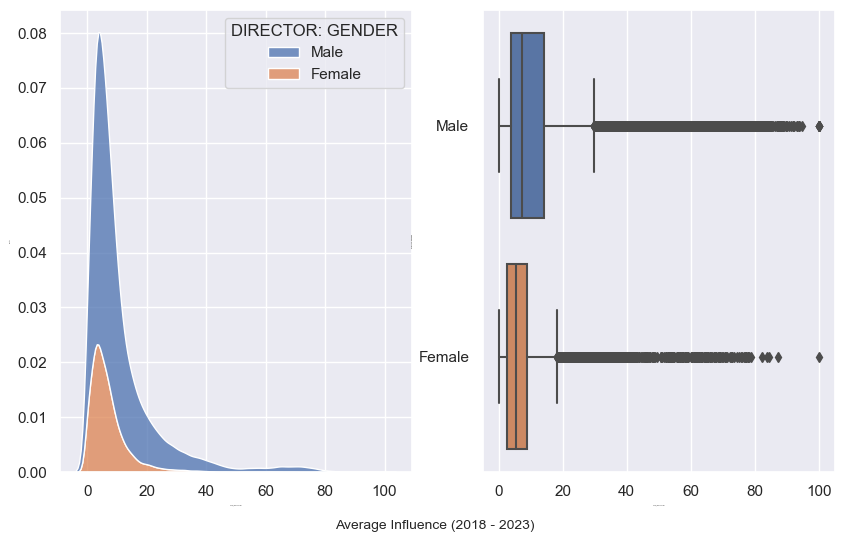

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.kdeplot(ax=axes[0], data=df_copy, x="AVG_INFLUENCE", hue="DIRECTOR: GENDER", multiple="stack")
sns.boxplot(ax=axes[1], data=df_copy, y= 'DIRECTOR: GENDER', x= 'AVG_INFLUENCE')
fig.supxlabel('Average Influence (2018 - 2023)', fontsize=10)

<AxesSubplot:xlabel='DIRECTOR: GENDER', ylabel='AVG_INFLUENCE'>

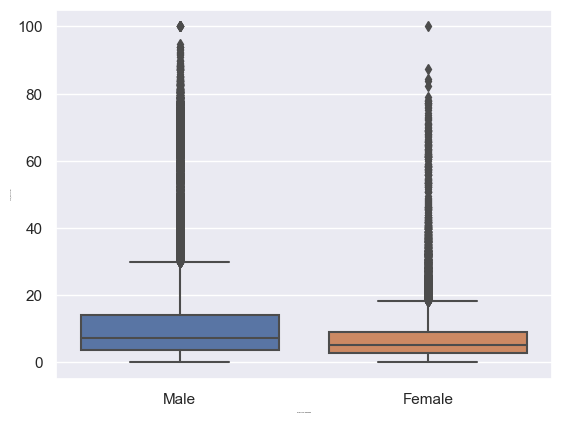

In [20]:
sns.boxplot(data=df_copy, x= 'DIRECTOR: GENDER', y= 'AVG_INFLUENCE')

In [21]:
df1 = df_copy[['DIRECTOR: GENDER','PERFORMANCE: EBITDA WIN RATE', 'PERFORMANCE: TSR WIN RATE', 'PERFORMANCE: CARBON INTENSITY WIN RATE', 'PERFORMANCE: CONTROVERSY WIN RATE', 'AVG_INFLUENCE']].copy()
df1.head()

,DIRECTOR: GENDER,PERFORMANCE: EBITDA WIN RATE,PERFORMANCE: TSR WIN RATE,PERFORMANCE: CARBON INTENSITY WIN RATE,PERFORMANCE: CONTROVERSY WIN RATE,AVG_INFLUENCE
0,Male,Unrated,Unrated,Unrated,Unrated,0.25
1,Female,0.312,0.521,0.819,1,3.25
2,Male,0.315,0.536,0.817,1,12.03
3,Female,Unrated,Unrated,Unrated,Unrated,1.30
4,Male,0.314,0.529,0.818,1,1.90


In [22]:
for col in df1.columns:
    if col == 'DIRECTOR: GENDER':
        continue
    else:
        df1.loc[df1[col] == 'Unrated', col] = np.nan
        df1[col] = df1[col].astype('float64')

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86531 entries, 0 to 86771
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DIRECTOR: GENDER                        86531 non-null  object 
 1   PERFORMANCE: EBITDA WIN RATE            48505 non-null  float64
 2   PERFORMANCE: TSR WIN RATE               43085 non-null  float64
 3   PERFORMANCE: CARBON INTENSITY WIN RATE  40438 non-null  float64
 4   PERFORMANCE: CONTROVERSY WIN RATE       58212 non-null  float64
 5   AVG_INFLUENCE                           86531 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.6+ MB


<AxesSubplot:xlabel='AVG_INFLUENCE', ylabel='PERFORMANCE: CONTROVERSY WIN RATE'>

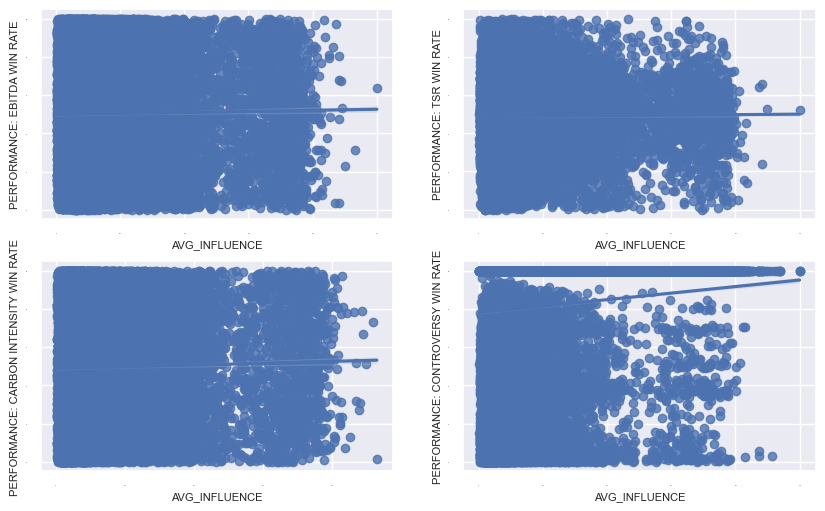

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.set(font_scale = -1)
plt.rcParams['axes.labelsize'] = 4
# fig.suptitle('Influence Driver comparison over the Average Influence of the Directors', fontweight = 'bold', fontsize=20)

sns.regplot(ax=axes[0, 0], data=df1, x='AVG_INFLUENCE', y='PERFORMANCE: EBITDA WIN RATE')
sns.regplot(ax=axes[0, 1], data=df1, x='AVG_INFLUENCE', y='PERFORMANCE: TSR WIN RATE')
sns.regplot(ax=axes[1, 0], data=df1, x='AVG_INFLUENCE', y='PERFORMANCE: CARBON INTENSITY WIN RATE')
sns.regplot(ax=axes[1, 1], data=df1, x='AVG_INFLUENCE', y='PERFORMANCE: CONTROVERSY WIN RATE')

In [27]:
sns.regplot(ax=axes[1, 1], data=df1, x='AVG_INFLUENCE', y='PERFORMANCE: CONTROVERSY WIN RATE', hue='DIRECTOR: GENDER')

TypeError: regplot() got an unexpected keyword argument 'hue'

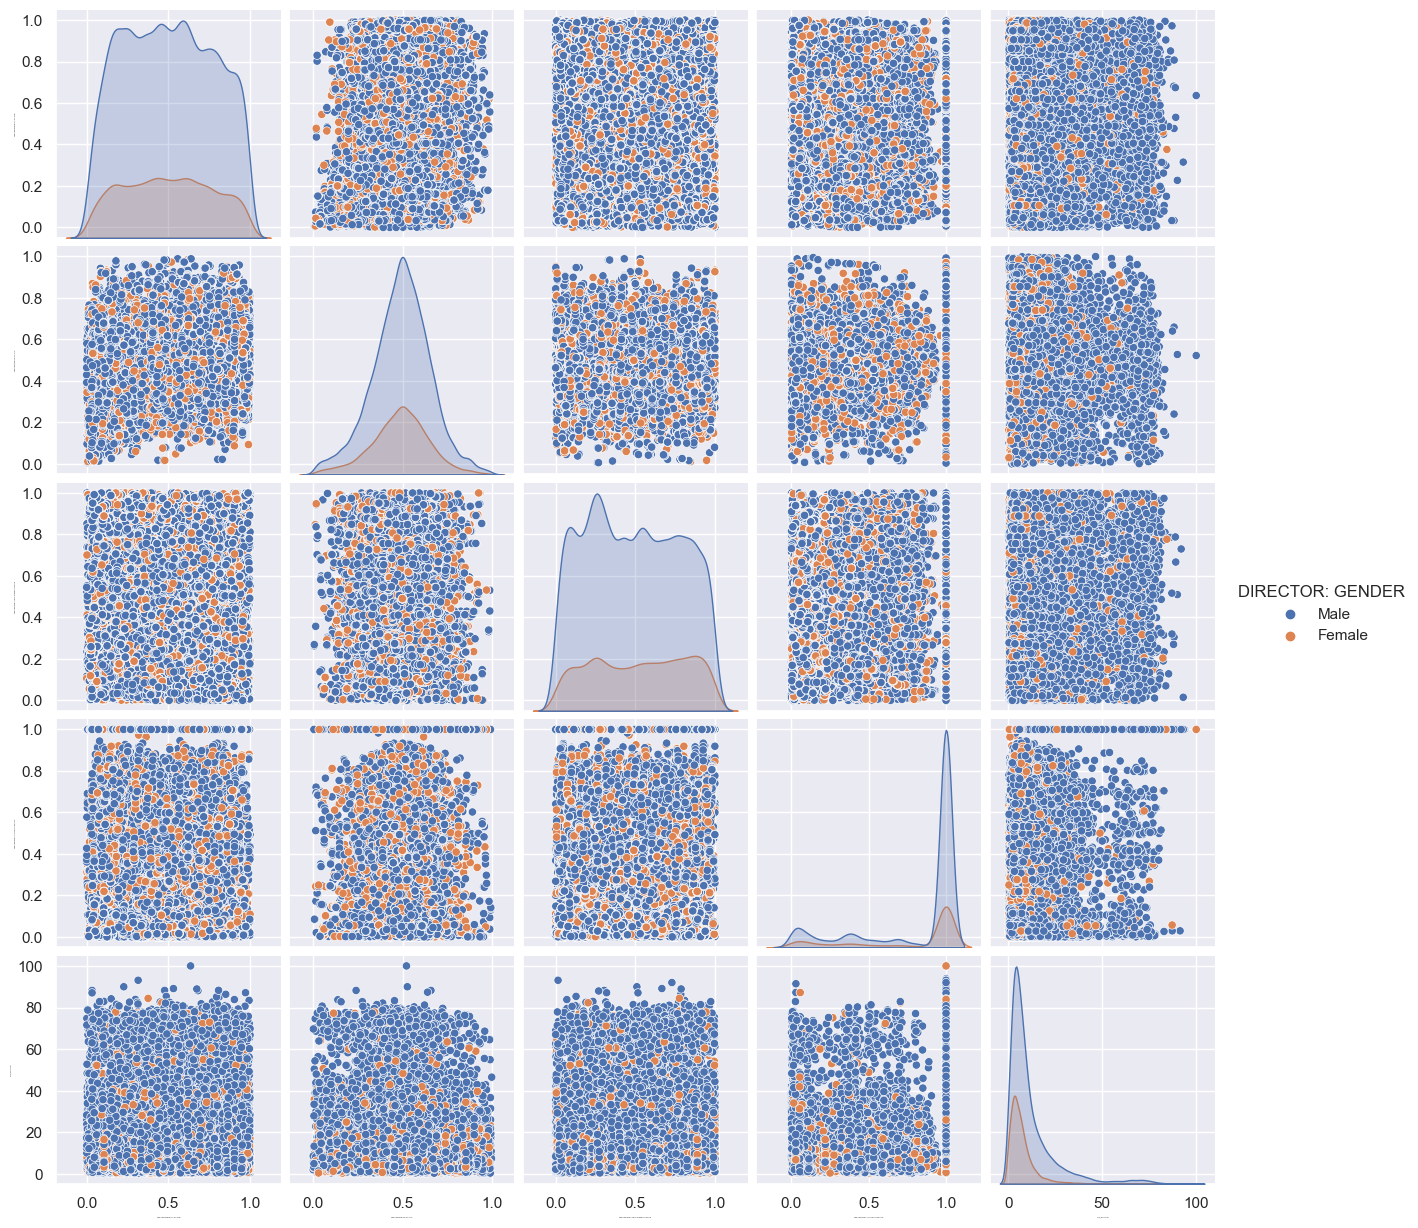

In [25]:
sns.pairplot(df1, hue='DIRECTOR: GENDER')
plt.show()

## Another

In [67]:
x_cols = ['DIRECTOR: AGE', 'DIRECTOR: ACTIVE BOARDS', 'DIRECTOR: BOARD HISTORY',
       'INFLUENCE DRIVER: ADVANCED DEGREE', 'INFLUENCE DRIVER: ELITE SCHOOL',
       'INFLUENCE DRIVER: HAS BEEN CEO',
       'INFLUENCE DRIVER: FOUNDER-CEO-FAMILY', 'INFLUENCE DRIVER: CHAIR ROLE',
       'INFLUENCE DRIVER: COMMITTEE ROLE',
       'INFLUENCE DRIVER: BOARD CONNECTIONS',
       'INFLUENCE DRIVER: STRUCTURAL ADVANTAGE',
       'DIRECTOR: GENDER_Female', 'DIRECTOR: GENDER_Male']
x= new_df[x_cols]
y= new_df['AVG_INFLUENCE']

In [68]:
x= sm.add_constant(x)

model= sm.OLS(y, x).fit()
pred = model.predict(x)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          AVG_INFLUENCE   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     5429.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        19:19:44   Log-Likelihood:            -2.2209e+05
No. Observations:               60976   AIC:                         4.442e+05
Df Residuals:                   60963   BIC:                         4.443e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='DIRECTOR: AGE', ylabel='AVG_INFLUENCE'>

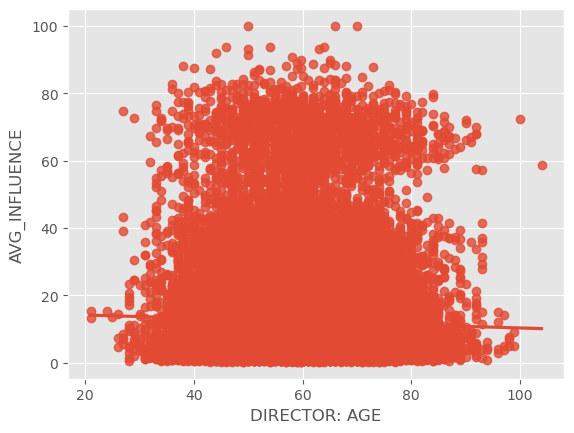

In [108]:
sns.regplot(data= new_df, x= 'DIRECTOR: AGE', y= 'AVG_INFLUENCE')

<AxesSubplot:xlabel='DIRECTOR: AGE', ylabel='AVG_INFLUENCE'>

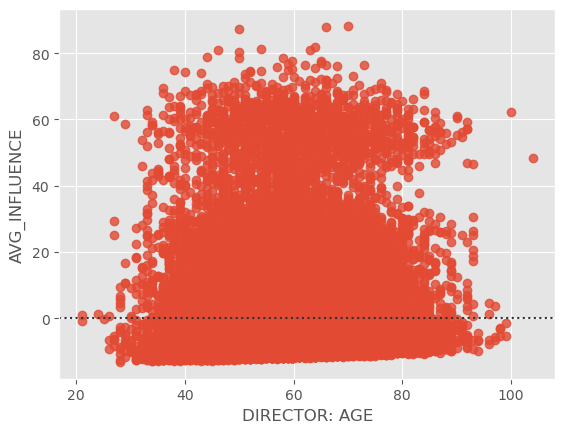

In [109]:
sns.residplot(data= new_df, x= 'DIRECTOR: AGE', y= 'AVG_INFLUENCE')

In [84]:
x= new_df[x_cols].copy()
y= new_df['AVG_INFLUENCE']

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [94]:
x_train

,DIRECTOR: AGE,DIRECTOR: ACTIVE BOARDS,DIRECTOR: BOARD HISTORY,INFLUENCE DRIVER: ADVANCED DEGREE,INFLUENCE DRIVER: ELITE SCHOOL,INFLUENCE DRIVER: HAS BEEN CEO,INFLUENCE DRIVER: FOUNDER-CEO-FAMILY,INFLUENCE DRIVER: CHAIR ROLE,INFLUENCE DRIVER: COMMITTEE ROLE,INFLUENCE DRIVER: BOARD CONNECTIONS,INFLUENCE DRIVER: STRUCTURAL ADVANTAGE,DIRECTOR: GENDER_Female,DIRECTOR: GENDER_Male
11717,59.692305,1,1,0,0,1,0,1,1,0,0,0,1
76835,67.000000,1,1,1,1,0,0,0,1,0,0,1,0
12695,70.000000,1,2,1,0,1,0,0,1,0,0,0,1
34714,47.000000,1,2,0,0,0,0,0,0,0,0,0,1
19182,69.000000,3,4,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56185,53.000000,1,1,0,1,0,0,0,1,0,0,0,1
29200,58.000000,1,1,1,0,0,0,0,0,0,0,0,1
15369,67.000000,3,3,1,1,0,0,0,1,0,0,0,1
85680,58.000000,3,3,0,0,1,1,0,0,1,1,0,1


In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [95]:
model = lr.fit(x, y)
response = model.predict(x)

In [96]:
r2 = model.score(x,y)

In [101]:
response

array([10.53162882, 39.9572637 ,  9.05823888, ..., 11.61384218,
       12.29214353, 21.05554921])